# Overfitting 

## Goals
In this lab, you will explore:
- the situations where overfitting can occur
- some of the solutions

In [14]:
import sys, os
import numpy as np
from pathlib import Path

try:
    %matplotlib widget
except:
    %matplotlib inline
    print("Colab not support matplotlib widget")
import matplotlib.pyplot as plt
from ipywidgets import Output


#先檢查README,有的話表示是完整檔案不用下載
def find_repo_root(marker="README.md"):
    cur = Path.cwd()
    while cur != cur.parent:  # 防止無限迴圈，到達檔案系統根目錄就停
        if (cur / marker).exists():
            return cur
        cur = cur.parent
    return None


def import_data_from_github():
    import os, urllib.request, pathlib, shutil
    
    def isRunningInColab() -> bool:
        return "google.colab" in sys.modules

    def isRunningInJupyterLab() -> bool:
        try:
            import jupyterlab
            return True
        except ImportError:
            return False
        
    def detect_env():
        from IPython import get_ipython
        if isRunningInColab():
            return "Colab"
        elif isRunningInJupyterLab():
            return "JupyterLab"
        elif "notebook" in str(type(get_ipython())).lower():
            return "Jupyter Notebook"
        else:
            return "Unknown"
        
    def get_utils_dir(env): 
        if env == "Colab": 
            if "/content" not in sys.path:
                sys.path.insert(0, "/content")
            return "/content/utils"
        else:
            return Path.cwd() / "utils"

    env = detect_env()
    UTILS_DIR = get_utils_dir(env)
    REPO_DIR = "Machine-Learning-Lab"

    shutil.rmtree(UTILS_DIR, ignore_errors=True)
    os.makedirs(UTILS_DIR, exist_ok=True)

    BASE = f"https://raw.githubusercontent.com/mz038197/{REPO_DIR}/main"
    urllib.request.urlretrieve(f"{BASE}/utils/plt_overfit.py", f"{UTILS_DIR}/plt_overfit.py")
    urllib.request.urlretrieve(f"{BASE}/utils/lab_utils_common_classification.py", f"{UTILS_DIR}/lab_utils_common_classification.py")
    urllib.request.urlretrieve(f"{BASE}/utils/deeplearning.mplstyle", f"{UTILS_DIR}/deeplearning.mplstyle")


repo_root = find_repo_root()

if repo_root is None:
    import_data_from_github()
    repo_root = Path.cwd()
    

os.chdir(repo_root)
print(f"✅ 切換工作目錄至 {Path.cwd()}")
sys.path.append(str(repo_root)) if str(repo_root) not in sys.path else None
print(f"✅ 加入到系統路徑")

from utils.plt_overfit import overfit_example, output

plt.style.use('utils/deeplearning.mplstyle')
print("✅ 匯入模組及設定繪圖樣式")

✅ 切換工作目錄至 d:\Work\Python\Machine-Learning-Lab
✅ 加入到系統路徑
✅ 匯入模組及設定繪圖樣式


# Overfitting
The week's lecture described situations where overfitting can arise. Run the cell below to generate a plot that will allow you to explore overfitting. There are further instructions below the cell.

Output()

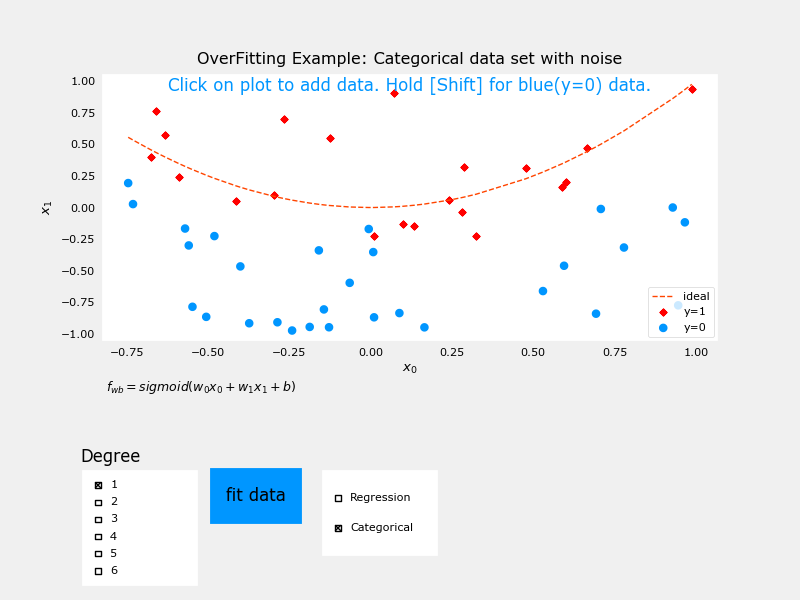

In [15]:
plt.close("all")
display(output)
ofit = overfit_example(False)

In the plot above you can:
- switch between Regression and Categorization examples
- add data
- select the degree of the model
- fit the model to the data  

Here are some things you should try:
- Fit the data with degree = 1; Note 'underfitting'.
- Fit the data with degree = 6; Note 'overfitting'
- tune degree to get the 'best fit'
- add data:
    - extreme examples can increase overfitting (assuming they are outliers).
    - nominal examples can reduce overfitting
- switch between `Regression` and `Categorical` to try both examples.

To reset the plot, re-run the cell. Click slowly to allow the plot to update before receiving the next click.

Notes on implementations:
- the 'ideal' curves represent the generator model to which noise was added to achieve the data set
- 'fit' does not use pure gradient descent to improve speed. These methods can be used on smaller data sets. 

## Congratulations!
You have developed some intuition about the causes and solutions to overfitting. In the next lab, you will explore a commonly used solution, Regularization.